## Hotel Booking Prediction

Student Name: Muhammad Sahil

Student ID: U2256817

## Import all neccessaery libraries

Importing required libraries together to avoid redundancy.

In [1]:
# Import necessary libraries
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Install category_encoders if not already installed
try:
    import category_encoders as ce
except ModuleNotFoundError:
    !pip install category_encoders
    import category_encoders as ce

import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold, SequentialFeatureSelector



!pip install category_encoders

ModuleNotFoundError: No module named 'tabulate'

Hotel Bookings File

In [ ]:
hotel_df = pd.read_csv('hotel_bookings.csv')


# 1. Data Pre-processing (25%)


---






## **Dropping irrelevant columns**

1.	arrival_date_year:

	**Why Dropped**: The year of arrival offers minimal value in predicting cancellations compared to the month or day. Unless you’re analyzing trends across different years, it provides little additional insight.

	**Observation**: Seasonal trends are better captured by the month and day, so the year is unnecessary for this task..


2.	arrival_date_week_number:

	**Why Dropped**: The week number is redundant when the month and day are already available. It provides a less granular view of the arrival date, making it less informative.

	**Observation**: The month and day are more specific and useful for understanding booking trends and seasonality.
3.	reservation_status_date:

	**Why Dropped**: This column records the date when the reservation status was last updated (e.g., cancellation or check-out), but it’s a post-event feature. Since we’re predicting cancellations, we don’t need this after-the-fact information.

	**Observation**: It’s useful for historical tracking but irrelevant for making future predictions about cancellations.

4. reservation_status:

   **Why Dropped**.: The presence of the reservation_status_ feature can cause data leakage because it contains information about the outcome of the booking (whether it was canceled or not).

   **Observation**: While reservation_status_ might be useful in other scenarios (e.g., for reporting or tracking booking statuses), it is irrelevant for predicting cancellations. Including it would compromise the model’s performance by making predictions based on future outcomes, leading to inflated accuracy and unnecessary complexity.

In [ ]:
columns_to_drop = ['arrival_date_year', 'arrival_date_week_number', 'reservation_status_date','reservation_status']
hotel_df.drop(columns_to_drop, axis=1, inplace=True)

## 1.1 Missing Values (10%)

Identifing and handling missing values.

### Identifying Missing Values

In [ ]:
# Check for missing values in the DataFrame and count them for each column
missing_values = hotel_df.isnull().sum()

# Display the total count of missing values for each column
print("Total missing values per column:")
print(missing_values)

# Filter columns with missing values and display only those columns and their counts
print("\nColumns with missing values and their count:")
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(hotel_df)) * 100

# Display only columns with missing values and their percentage
print("\nPercentage of missing values in each column:")
print(missing_percentage[missing_percentage > 0])


Total missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list    

### Analysing children Column

In [ ]:
hotel_df['adults'].value_counts()

,count
adults,
2,89680
1,23027
3,6202
0,403
4,62
26,5
27,2
20,2
5,2


In [ ]:
#printing children column
print(hotel_df['children'].value_counts())

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64


Skewness of children column: 4.11258954232252
Kurtosis of children column: 18.673692362954903
Mean of 'children' column: 0.10388990333874994
Median of 'children' column: 0.0
The data is right-skewed.


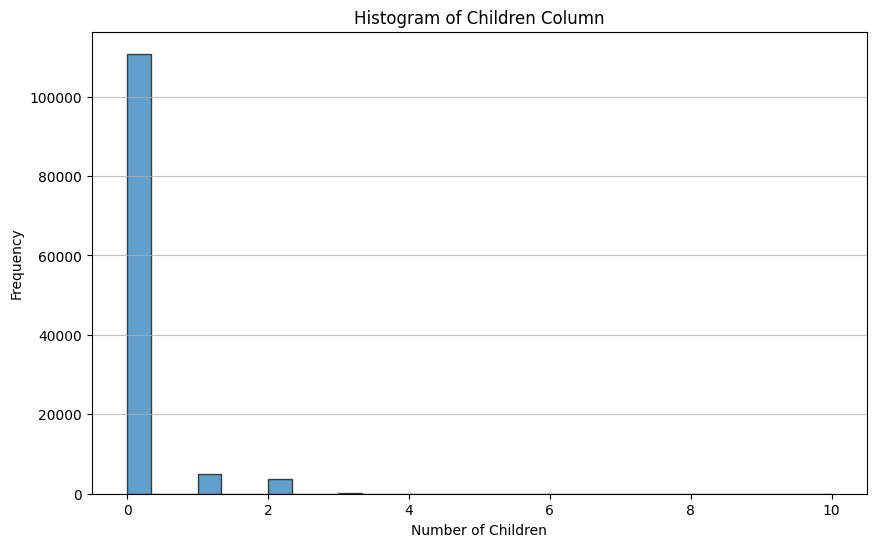

In [ ]:
skewness = hotel_df['children'].skew()
print("Skewness of children column:", skewness)
kurtosis = hotel_df['children'].kurt()
print("Kurtosis of children column:", kurtosis)


# Calculating mean and median of the 'children' column
mean_children = hotel_df['children'].mean()
median_children = hotel_df['children'].median()

# Displaing the results
print(f"Mean of 'children' column: {mean_children}")
print(f"Median of 'children' column: {median_children}")

# Interpretation of the result
if mean_children > median_children:
    print("The data is right-skewed.")
elif mean_children < median_children:
    print("The data is left-skewed.")
else:
    print("The data is symmetric.")

    import pandas as pd
import matplotlib.pyplot as plt


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(hotel_df['children'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Children Column')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



### Analysing country column

In [ ]:
print(hotel_df['country'].value_counts())

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


### Analysing agent column

In [ ]:
print(hotel_df['agent'].value_counts())

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


### Analysing compnay Column

In [ ]:
print(hotel_df['company'].value_counts())

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64


### Handling Missing Values

In [ ]:
# Filling missing values in the 'children' column with the median
hotel_df['children'] = hotel_df['children'].fillna(hotel_df['children'].median())  # Filling missing values with the median

# Filling missing values in the 'country' column with the mode
most_common_country = hotel_df['country'].mode()[0]  # Get the most common country
hotel_df['country'] = hotel_df['country'].fillna(most_common_country)  # Filling missing values with the mode


# Filling missing values in the 'agent' and 'company' columns with -1 for unknown values
hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].fillna(-1)


Children Column

*   **Why:** The missing values in the "children" column were filled with the median because the distribution of this data was highly positively skewed, with a skewness of 4.11. The median is less affected by extreme values (outliers), making it a better representation of the typical number of children per booking.
    
*   **Observation:** After imputation, there were no missing values in the "children" column. The median accurately reflects the central tendency of the data, avoiding distortion from rare bookings with a large number of children.
     

Agent and Company Columns

*   **Why:** The missing values in the "agent" and "company" columns were filled with a placeholder value of -1, which indicates 'unknown'. This approach allows the analysis to continue without losing significant data while acknowledging the absence of information.
    
*   **Observation:** Both columns were successfully filled with -1, eliminating missing values. This imputation allows for the inclusion of these columns in subsequent analyses while clearly indicating that the entries are unknown.


In [ ]:
# Verify missing data has been handled
print("Missing values after handling:")
print(hotel_df.isnull().sum())

Missing values after handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces      

### Unique values

Finding out unique values in columns, which can be helpful in identifying in-consistent data.

In [ ]:
# List of columns to check for unique values
columns_to_check = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
                   'arrival_date_day_of_month', 'stays_in_weekend_nights',
                   'stays_in_week_nights', 'adults', 'children', 'babies',
                   'meal', 'country', 'market_segment', 'distribution_channel']

# Iterating through the columns and printing unique values
for column in columns_to_check:
  unique_values = hotel_df[column].unique()
  print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'hotel':
['Resort Hotel' 'City Hotel']

Unique values in 'is_canceled':
[0 1]

Unique values in 'lead_time':
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 19

## 1.2 Removing Inconsistent values and Outliers (10%)

### Handling Inconsistent Values

In [ ]:
# 1. Incomplete bookings (zero adults, babies, and children)
incomplete_bookings = hotel_df[(hotel_df['adults'] == 0) &
                               (hotel_df['children'] == 0) &
                               (hotel_df['babies'] == 0)]

print("\n" + "="*40)
print(f"Number of incomplete bookings: {len(incomplete_bookings)}")
print("Sample of incomplete bookings:")
print(tabulate(incomplete_bookings.head(), headers='keys', tablefmt='psql'))

# 2. Rows with zero nights stayed
zero_nights = hotel_df[(hotel_df['stays_in_weekend_nights'] == 0) &
                       (hotel_df['stays_in_week_nights'] == 0)]

print("\n" + "="*40)
print(f"Number of bookings with zero nights stayed: {len(zero_nights)}")
print("Sample of bookings with zero nights:")
print(tabulate(zero_nights.head(), headers='keys', tablefmt='psql'))

# 3. Negative lead time
negative_lead_time = hotel_df[hotel_df['lead_time'] < 0]

print("\n" + "="*40)
print(f"Number of bookings with negative lead time: {len(negative_lead_time)}")
print("Sample of bookings with negative lead time:")
print(tabulate(negative_lead_time.head(), headers='keys', tablefmt='psql'))

# 4. Negative or zero ADR (Average Daily Rate)
invalid_adr = hotel_df[hotel_df['adr'] <= 0]

print("\n" + "="*40)
print(f"Number of bookings with invalid ADR: {len(invalid_adr)}")
print("Sample of bookings with invalid ADR:")
print(tabulate(invalid_adr.head(), headers='keys', tablefmt='psql'))

# 5. Negative previous bookings
negative_prev_bookings = hotel_df[(hotel_df['previous_cancellations'] < 0) |
                                  (hotel_df['previous_bookings_not_canceled'] < 0)]

print("\n" + "="*40)
print(f"Number of bookings with negative previous bookings: {len(negative_prev_bookings)}")
print("Sample of bookings with negative previous bookings:")
print(tabulate(negative_prev_bookings.head(), headers='keys', tablefmt='psql'))


Number of incomplete bookings: 180
Sample of incomplete bookings:
+------+--------------+---------------+-------------+----------------------+-----------------------------+---------------------------+------------------------+----------+------------+----------+--------+-----------+------------------+------------------------+---------------------+--------------------------+----------------------------------+----------------------+----------------------+-------------------+----------------+---------+-----------+------------------------+-----------------+-------+-------------------------------+-----------------------------+
|      | hotel        |   is_canceled |   lead_time | arrival_date_month   |   arrival_date_day_of_month |   stays_in_weekend_nights |   stays_in_week_nights |   adults |   children |   babies | meal   | country   | market_segment   | distribution_channel   |   is_repeated_guest |   previous_cancellations |   previous_bookings_not_canceled | reserved_room_type   | assi

### Replacing Inconsistent Values:

**Zero Nights Stayed (Rows with Zero Weekend and Weekday Nights)**

•**Why**: The rows with both stays\_in\_weekend\_nights and stays\_in\_week\_nights equal to 0 were checked because it is inconsistent for a hotel booking to have no nights stayed unless the booking was canceled or a no-show. This check helps identify potential data entry errors or canceled bookings.

•**Observation**: No rows in the dataset contained zero nights stayed after filtering. This suggests that either these records were already removed in earlier cleaning processes or that no such inconsistencies exist in the data. Therefore, no further action was required for this check.

**Incomplete Bookings (Zero Adults, Children, and Babies)**

•**Why**: Bookings with zero adults, children, and babies were identified as incomplete since a valid hotel booking should have at least one guest. These entries are likely erroneous and needed to be flagged for removal to avoid skewing the analysis or prediction models.

•**Observation**: A total of **180 incomplete bookings** were found. These records were likely invalid, so they were removed to ensure the dataset only contains meaningful entries.

**Negative Lead Time**

•**Why**: Lead time represents the number of days between the booking date and the arrival date, and it should never be negative. Checking for negative lead time ensures there are no logical inconsistencies in the data.

•**Observation**: No bookings had negative lead time values, which indicates that the lead time data is valid, and no further corrections were needed.

**Invalid ADR (Average Daily Rate ≤ 0)**

•**Why**: ADR represents the average daily revenue per room, and it should always be greater than zero for a valid booking. Checking for ADR values less than or equal to 0 helps identify potentially incorrect data entries, such as free or invalid bookings.

•**Observation**: A total of **1,960 bookings** had an ADR of 0 or less, which is inconsistent with valid hotel operations. These records were flagged for removal or further investigation, as they could distort the analysis.

**Negative Previous Bookings**

•**Why**: Checking for negative values in previous\_cancellations or previous\_bookings\_not\_canceled ensures that these columns don’t contain logical inconsistencies. Negative values in these fields would be invalid since previous bookings can’t be negative.

•**Observation**: No bookings were found with negative values in the previous bookings columns, meaning this part of the data is valid and consistent.

In [ ]:
# Remove incomplete bookings
hotel_df = hotel_df[(hotel_df['adults'] != 0) | (hotel_df['children'] != 0) | (hotel_df['babies'] != 0)]
# Remove bookings with zero nights stayed
hotel_df = hotel_df[~((hotel_df['stays_in_weekend_nights'] == 0) &
                      (hotel_df['stays_in_week_nights'] == 0))]
# Remove bookings with invalid ADR
hotel_df = hotel_df[hotel_df['adr'] > 0]


In [ ]:
# Save the rows with zero nights stayed (for review or backup)
removed_zero_nights = hotel_df[(hotel_df['stays_in_weekend_nights'] == 0) &
                               (hotel_df['stays_in_week_nights'] == 0)]

# Remove the rows from the main dataset
hotel_df = hotel_df[~((hotel_df['stays_in_weekend_nights'] == 0) &
                      (hotel_df['stays_in_week_nights'] == 0))]

# Review removed entries (optional)
print(removed_zero_nights.head())

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_month, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests]
Index: []

[0 rows x 28 columns]


### After Replacing Inconsistent Values:

In [ ]:
# 1. Incomplete bookings (zero adults, babies, and children)
incomplete_bookings = hotel_df[(hotel_df['adults'] == 0) &
                               (hotel_df['children'] == 0) &
                               (hotel_df['babies'] == 0)]

print("\n" + "="*40)
print(f"Number of incomplete bookings: {len(incomplete_bookings)}")
print("Sample of incomplete bookings:")
print(tabulate(incomplete_bookings.head(), headers='keys', tablefmt='psql'))

# 2. Rows with zero nights stayed
zero_nights = hotel_df[(hotel_df['stays_in_weekend_nights'] == 0) &
                       (hotel_df['stays_in_week_nights'] == 0)]

print("\n" + "="*40)
print(f"Number of bookings with zero nights stayed: {len(zero_nights)}")
print("Sample of bookings with zero nights:")
print(tabulate(zero_nights.head(), headers='keys', tablefmt='psql'))

# 3. Negative lead time
negative_lead_time = hotel_df[hotel_df['lead_time'] < 0]

print("\n" + "="*40)
print(f"Number of bookings with negative lead time: {len(negative_lead_time)}")
print("Sample of bookings with negative lead time:")
print(tabulate(negative_lead_time.head(), headers='keys', tablefmt='psql'))

# 4. Negative or zero ADR (Average Daily Rate)
invalid_adr = hotel_df[hotel_df['adr'] <= 0]

print("\n" + "="*40)
print(f"Number of bookings with invalid ADR: {len(invalid_adr)}")
print("Sample of bookings with invalid ADR:")
print(tabulate(invalid_adr.head(), headers='keys', tablefmt='psql'))

# 5. Negative previous bookings
negative_prev_bookings = hotel_df[(hotel_df['previous_cancellations'] < 0) |
                                  (hotel_df['previous_bookings_not_canceled'] < 0)]

print("\n" + "="*40)
print(f"Number of bookings with negative previous bookings: {len(negative_prev_bookings)}")
print("Sample of bookings with negative previous bookings:")
print(tabulate(negative_prev_bookings.head(), headers='keys', tablefmt='psql'))


Number of incomplete bookings: 0
Sample of incomplete bookings:
+---------+---------------+-------------+----------------------+-----------------------------+---------------------------+------------------------+----------+------------+----------+--------+-----------+------------------+------------------------+---------------------+--------------------------+----------------------------------+----------------------+----------------------+-------------------+----------------+---------+-----------+------------------------+-----------------+-------+-------------------------------+-----------------------------+
| hotel   | is_canceled   | lead_time   | arrival_date_month   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking

### Box Plate:

In [ ]:
# Selecting all numeric columns
numeric_columns = hotel_df.select_dtypes(include=np.number).columns.tolist()

print(numeric_columns)

['is_canceled', 'lead_time', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


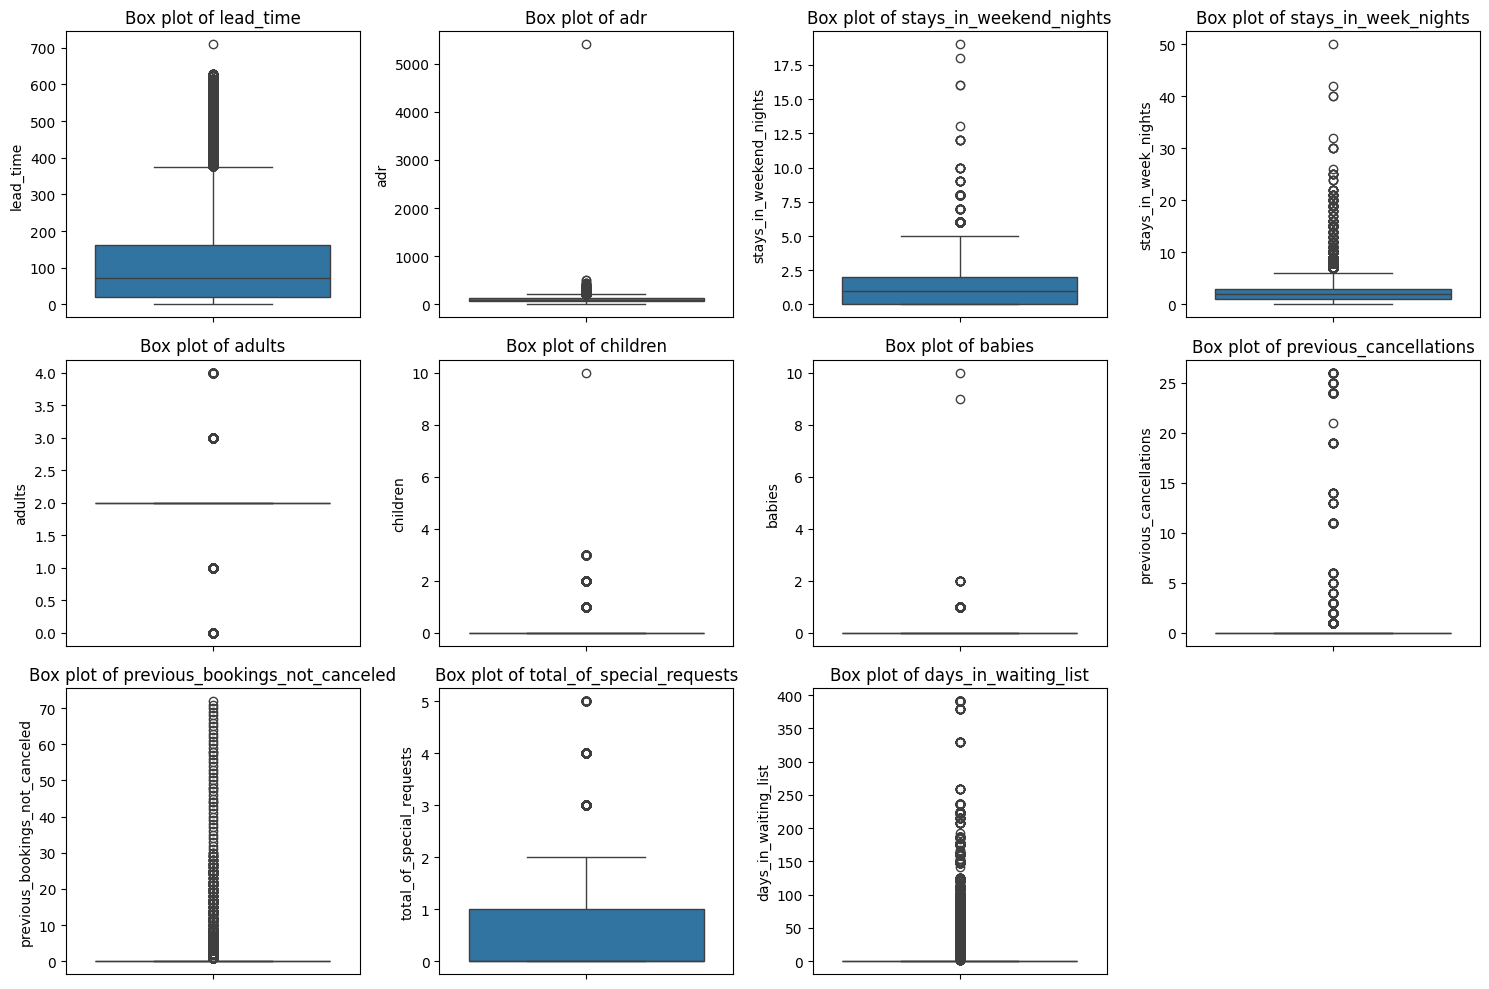

In [ ]:
# Defining the numeric columns suitable for outlier analysis
numeric_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adults', 'children', 'babies', 'previous_cancellations',
                   'previous_bookings_not_canceled', 'total_of_special_requests', 'days_in_waiting_list']

# Creating box plots for each numeric column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=hotel_df[column])
    plt.title(f'Box plot of {column}')

# Display the box plots
plt.tight_layout()
plt.show()

In [ ]:
# Get the numeric columns from the dataset
numeric_data = hotel_df.select_dtypes(include=['int64', 'float64'])

# Display the numeric columns
print("Numeric Columns:")
print(numeric_data.columns)

# Show summary statistics to help identify outliers
print("\nSummary Statistics of Numeric Data:")
print(numeric_data.describe())

# Optional: display the first few rows to understand the data
print("\nSample of Numeric Data:")
print(numeric_data.head())

Numeric Columns:
Index(['is_canceled', 'lead_time', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

Summary Statistics of Numeric Data:
         is_canceled      lead_time  arrival_date_day_of_month  \
count  117399.000000  117399.000000              117399.000000   
mean        0.374884     105.094370                  15.802826   
std         0.484095     106.913558                   8.783448   
min         0.000000       0.000000                   1.000000   
25%         0.000000      19.000000                   8.000000   
50%         0.000000      71.000000                  16.000000   
75%         1.000000     162.000000                  23.000000   
ma

### Applying IQR Capping

The dataset, presumed to contain hotel booking information, was subjected to outlier management using the Interquartile Range (IQR) capping technique. This approach aimed to minimize the impact of extreme values on subsequent data analysis.

**Methodology:**

1.  **IQR Calculation:** For each numerical feature within the dataset (e.g., lead time, average daily rate, stay duration), the interquartile range (IQR) was calculated. This involved identifying the 25th percentile (Q1) and the 75th percentile (Q3) of the data distribution for each feature and then computing the difference: IQR = Q3 - Q1.
    
2.  **Boundary Determination:** Outliers were identified by establishing upper and lower bounds based on the calculated IQR. These bounds were typically set at 1.5 times the IQR above Q3 and below Q1, respectively. Any data points falling outside these boundaries were considered potential outliers.
    
3.  **Outlier Capping:** To mitigate the influence of outliers, a capping procedure was applied. Values exceeding the upper bound were capped at the upper bound value, effectively limiting their impact on the data distribution. Similarly, values falling below the lower bound were capped at the lower bound value.
    

**Impact on Specific Features:**

1. **Lead Time**

•**Why**: The maximum lead time was capped to prevent excessively high booking lead times from distorting the data.

•**Observation**: The maximum value reduced to **376.5**, providing a more realistic distribution for booking lead times.

2. **ADR (Average Daily Rate)**

•**Why**: Extremely high daily rates were capped to maintain a reasonable range of prices.

•**Observation**: The maximum ADR is now **209.205**. The mean ADR has adjusted to **102.29**, reflecting real-world pricing better after removing extreme values.

3. **Stays in Weekend and Week Nights**

•**Why**: Capping stay durations prevents skewing by excessively long bookings.

•**Observation**: The maximum stays were capped at **5** for weekend nights and **6** for weeknights, reflecting more typical stay durations.

4. **Adults, Children, and Babies**

•**Why**: Capping was applied to avoid unrealistic numbers of guests in each booking.

•**Observation**: Guest numbers were capped within reasonable limits, ensuring typical room bookings without outliers affecting the data.


5. **Special Requests and Parking Spaces**

•**Why**: Capping unusually high requests ensures the data reflects typical booking behavior.

•**Observation**: The maximum value for special requests is now **2.5**, and car parking requests were similarly capped, ensuring a realistic number of requests.

6. **Booking Changes**

•**Why**: The number of booking changes was capped to avoid the influence of extremely high changes that could skew the data analysis.

•**Observation**: The maximum number of booking changes was capped at 4, providing a more stable distribution that reflects typical customer behavior.

7. **Days in Waiting List**

•**Why**: Capping the days spent on the waiting list ensures that the dataset does not include outliers that may represent unusual circumstances.

•**Observation**: The maximum value for days in the waiting list was capped at 30, which aligns with standard practices and provides a more accurate reflection of booking dynamics.

8. **Required Car Parking Spaces**

•**Why**: Limiting the number of requested car parking spaces prevents the data from being skewed by unrealistic requests.

•Observation: The maximum value for required parking spaces was capped at 2, ensuring that the data remains consistent with typical customer requirements.

9. **Total of Special Requests**

•**Why**: Capping unusually high special requests prevents outlier effects on the data and maintains realistic booking scenarios.

•**Observation**: The maximum for total special requests was capped at 3, reflecting standard customer requests without distorting overall trends.

In [ ]:
# Function to apply IQR capping
def cap_outliers_iqr(column):
    Q1 = hotel_df[column].quantile(0.25)
    Q3 = hotel_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hotel_df[column] = hotel_df[column].clip(lower=lower_bound, upper=upper_bound)

# numeric columns where we are applying IQR capping
numeric_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list',
                   'required_car_parking_spaces', 'total_of_special_requests']

# Applying IQR capping to each numeric column
for column in numeric_columns:
    cap_outliers_iqr(column)

# Verifying the changes by checking summary statistics
print("Summary statistics after IQR capping:")
print(hotel_df.describe())

Summary statistics after IQR capping:
         is_canceled      lead_time  arrival_date_day_of_month  \
count  117399.000000  117399.000000              117399.000000   
mean        0.374884     103.385991                  15.802826   
std         0.484095     101.422627                   8.783448   
min         0.000000       0.000000                   1.000000   
25%         0.000000      19.000000                   8.000000   
50%         0.000000      71.000000                  16.000000   
75%         1.000000     162.000000                  23.000000   
max         1.000000     376.500000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights    adults  children  \
count            117399.000000         117399.000000  117399.0  117399.0   
mean                  0.931601              2.426716       2.0       0.0   
std                   0.967498              1.521644       0.0       0.0   
min                   0.000000              0.000000       2.0 

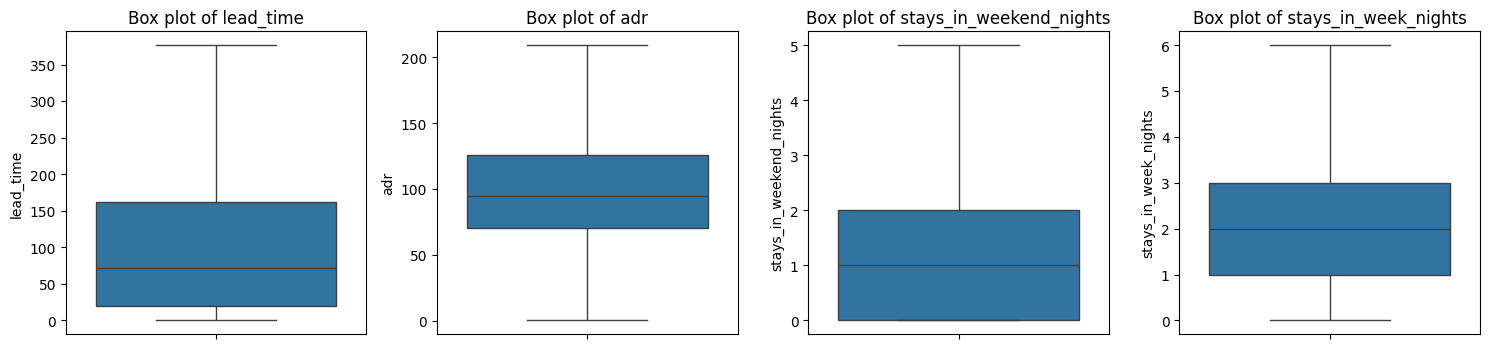

In [ ]:
# Define the numeric columns for outlier analysis
numeric_columns = ['lead_time', 'adr', 'stays_in_weekend_nights',
                   'stays_in_week_nights']

# Create box plots for each numeric column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Arrange plots in a 3x4 grid
    sns.boxplot(y=hotel_df[column])
    plt.title(f'Box plot of {column}')

# Display the box plots
plt.tight_layout()
plt.show()

## 1.3 Column data type conversion (5%)

**Why:**

The data type conversion was necessary to ensure that each column in the dataset is correctly represented, making it easier for analysis and modeling. Converting categorical variables (like meal, country, market_segment) to the category type helps reduce memory usage and improves model performance. Numeric columns (such as lead_time, adr, children) were converted to their appropriate integer or float types to allow proper mathematical operations, while date columns were converted to datetime to facilitate time-based analysis.

**Observation:**

 All columns were successfully converted to their appropriate data types. The categorical columns now take up less memory, numeric columns are correctly formatted for operations, and the date columns are in a format that allows easy manipulation for future time-based calculations. No inconsistencies were observed during the conversion process.

### Before Conversion

In [ ]:
print(hotel_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 117399 entries, 2 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117399 non-null  object 
 1   is_canceled                     117399 non-null  int64  
 2   lead_time                       117399 non-null  float64
 3   arrival_date_month              117399 non-null  object 
 4   arrival_date_day_of_month       117399 non-null  int64  
 5   stays_in_weekend_nights         117399 non-null  int64  
 6   stays_in_week_nights            117399 non-null  int64  
 7   adults                          117399 non-null  int64  
 8   children                        117399 non-null  float64
 9   babies                          117399 non-null  int64  
 10  meal                            117399 non-null  object 
 11  country                         117399 non-null  object 
 12  market_segment       

In [ ]:
# Check unique values before conversion to diagnose issues
print("Unique values in 'agent':", hotel_df['agent'].unique())
print("Unique values in 'company':", hotel_df['company'].unique())



Unique values in 'agent': [ -1. 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 185. 330. 334. 328. 326. 321. 324. 313.  38. 155.
  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.  91.
 245. 253. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 135. 350. 195. 352.
 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427. 431.
 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 454. 455.  59. 451.
 254. 180. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508. 535.
 497. 187.  13.   7.  27.  14.  22.  17.  28.  42. 

In [ ]:
# Convert booleans
hotel_df['is_canceled'] = hotel_df['is_canceled'].astype('bool')
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].astype('bool')

# Convert categorical columns
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type',
                        'customer_type']
for col in categorical_columns:
    hotel_df[col] = hotel_df[col].astype('category')

# Convert agent and company to categorical (handling potential errors)
hotel_df['agent'] = pd.to_numeric(hotel_df['agent'], errors='coerce').astype('Int64')  # Convert to numeric first
hotel_df['agent'] = hotel_df['agent'].astype('category')
hotel_df['company'] = pd.to_numeric(hotel_df['company'], errors='coerce').astype('Int64')  # Convert to numeric first
hotel_df['company'] = hotel_df['company'].astype('category')


# Convert arrival_date_month to categorical with ordered categories
month_categories = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=month_categories, ordered=True)

# Convert remaining numerical columns to appropriate types
hotel_df['arrival_date_day_of_month'] = hotel_df['arrival_date_day_of_month'].astype('int')
hotel_df['lead_time'] = hotel_df['lead_time'].astype('int')
hotel_df['stays_in_weekend_nights'] = hotel_df['stays_in_weekend_nights'].astype('int')
hotel_df['stays_in_week_nights'] = hotel_df['stays_in_week_nights'].astype('int')
hotel_df['adults'] = hotel_df['adults'].astype('int')
hotel_df['children'] = hotel_df['children'].astype('int')
hotel_df['babies'] = hotel_df['babies'].astype('int')
hotel_df['adr'] = hotel_df['adr'].astype('float')
hotel_df['required_car_parking_spaces'] = hotel_df['required_car_parking_spaces'].astype('int')
hotel_df['total_of_special_requests'] = hotel_df['total_of_special_requests'].astype('int')
hotel_df['previous_cancellations'] = hotel_df['previous_cancellations'].astype('int')
hotel_df['previous_bookings_not_canceled'] = hotel_df['previous_bookings_not_canceled'].astype('int')
hotel_df['booking_changes'] = hotel_df['booking_changes'].astype('int')
hotel_df['days_in_waiting_list'] = hotel_df['days_in_waiting_list'].astype('int')

In [ ]:


# Check for missing values in 'agent' and 'company' columns
print("Missing values in 'agent' column:", hotel_df['agent'].isnull().sum())
print("Missing values in 'company' column:", hotel_df['company'].isnull().sum())

# Identify non-numeric and non-NaN values in 'agent'
non_numeric_agents = hotel_df['agent'][
    pd.to_numeric(hotel_df['agent'], errors='coerce').isnull() & hotel_df['agent'].notnull()
]
print("\nNon-numeric and non-NaN values in 'agent' column:")
print(non_numeric_agents)

# Identify non-numeric and non-NaN values in 'company'
non_numeric_companies = hotel_df['company'][
    pd.to_numeric(hotel_df['company'], errors='coerce').isnull() & hotel_df['company'].notnull()
]
print("\nNon-numeric and non-NaN values in 'company' column:")
print(non_numeric_companies)

Missing values in 'agent' column: 0
Missing values in 'company' column: 0

Non-numeric and non-NaN values in 'agent' column:
Series([], Name: agent, dtype: category
Categories (333, Int64): [-1, 1, 2, 3, ..., 526, 527, 531, 535])

Non-numeric and non-NaN values in 'company' column:
Series([], Name: company, dtype: category
Categories (344, Int64): [-1, 6, 8, 9, ..., 534, 539, 541, 543])


### After Conversion

In [ ]:
print(hotel_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 117399 entries, 2 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           117399 non-null  category
 1   is_canceled                     117399 non-null  bool    
 2   lead_time                       117399 non-null  int64   
 3   arrival_date_month              117399 non-null  category
 4   arrival_date_day_of_month       117399 non-null  int64   
 5   stays_in_weekend_nights         117399 non-null  int64   
 6   stays_in_week_nights            117399 non-null  int64   
 7   adults                          117399 non-null  int64   
 8   children                        117399 non-null  int64   
 9   babies                          117399 non-null  int64   
 10  meal                            117399 non-null  category
 11  country                         117399 non-null  category
 12  market_

# 2. Exploratory Data Analysis (25%)


---


In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set Seaborn styling
sns.set_style('darkgrid')
sns.set_palette("husl")
#1
def plot_hotel_cancellations(df, hotel_column='hotel', cancellation_column='is_canceled'):

    try:
        # Calculate statistics
        hotel_stats = df.groupby(hotel_column).agg({
            cancellation_column: ['count', 'mean', 'sum']
        }).round(4)

        hotel_stats.columns = ['total_bookings', 'cancellation_rate', 'total_cancellations']
        hotel_stats['cancellation_percentage'] = hotel_stats['cancellation_rate'] * 100

        # Create visualization
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(x=hotel_stats.index,
                        y=hotel_stats['cancellation_percentage'],
                        palette="husl")

        # Enhance plot
        plt.title("Hotel Cancellation Analysis", pad=20, size=14, fontweight='bold')
        plt.xlabel("Hotel Type", size=12)
        plt.ylabel("Cancellation Rate (%)", size=12)

        # Add detailed annotations
        for i, row in enumerate(hotel_stats.itertuples()):
            total = row.total_bookings
            canceled = row.total_cancellations
            rate = row.cancellation_percentage

            ax.text(i, rate + 1,
                   f'Rate: {rate:.1f}%\nTotal: {total:,}\nCanceled: {canceled:,}',
                   ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        return hotel_stats

    except KeyError as e:
        print(f"Error: {e}. Required columns not found in the dataset.")
#2
def plot_meal_distribution(df, meal_column='meal'):

    try:
        # Calculate statistics
        meal_stats = df[meal_column].value_counts()
        meal_percentages = (meal_stats / len(df) * 100).round(2)

        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Bar plot
        sns.barplot(x=meal_stats.index, y=meal_stats.values, palette="husl", ax=ax1)
        ax1.set_title("Meal Type Distribution (Count)", pad=20, size=12)
        ax1.set_xlabel("Meal Type", size=11)
        ax1.set_ylabel("Number of Bookings", size=11)
        ax1.tick_params(axis='x', rotation=45)

        # Add count and percentage labels
        for i, (count, percentage) in enumerate(zip(meal_stats, meal_percentages)):
            ax1.text(i, count, f'{count:,}\n({percentage:.1f}%)',
                    ha='center', va='bottom')

        # Pie chart
        wedges, texts, autotexts = ax2.pie(meal_percentages,
                                          labels=meal_stats.index,
                                          autopct='%1.1f%%',
                                          colors=sns.color_palette("husl", len(meal_stats)))
        ax2.set_title("Meal Type Distribution (%)", pad=20, size=12)

        plt.tight_layout()
        plt.show()

        # Return detailed statistics
        stats = {
            'total_bookings': len(df),
            'meal_type_counts': meal_stats,
            'meal_type_percentages': meal_percentages
        }

        return stats

    except KeyError as e:
        print(f"Error: {e}. Required columns not found in the dataset.")
#3
def plot_returning_guests(df, returning_guest_column='is_repeated_guest'):

    try:
        # Calculate statistics
        guest_stats = df[returning_guest_column].value_counts()
        guest_percentages = (guest_stats / len(df) * 100).round(2)

        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Pie chart with enhanced styling
        colors = sns.color_palette("husl", 2)
        wedges, texts, autotexts = ax1.pie(guest_percentages,
                                          labels=['First-time', 'Returning'] if guest_stats.index[0] == 0 else ['Returning', 'First-time'],
                                          autopct='%1.1f%%',
                                          colors=colors,
                                          explode=(0.05, 0))
        ax1.set_title("Guest Distribution", pad=20, size=14, fontweight='bold')

        # Bar chart with detailed information
        sns.barplot(x=['First-time', 'Returning'] if guest_stats.index[0] == 0 else ['Returning', 'First-time'],
                   y=guest_stats.values,
                   palette=colors,
                   ax=ax2)

        ax2.set_title("Guest Count Breakdown", pad=20, size=14, fontweight='bold')
        ax2.set_xlabel("Guest Type", size=12)
        ax2.set_ylabel("Number of Bookings", size=12)

        # Add value labels
        for i, (count, percentage) in enumerate(zip(guest_stats.values, guest_percentages)):
            ax2.text(i, count, f'{count:,}\n({percentage:.1f}%)',
                    ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Return detailed statistics
        stats = {
            'total_bookings': len(df),
            'returning_guests': int(guest_stats.get(1, 0)),
            'first_time_guests': int(guest_stats.get(0, 0)),
            'returning_percentage': float(guest_percentages.get(1, 0)),
            'first_time_percentage': float(guest_percentages.get(0, 0))
        }

        return stats

    except KeyError as e:
        print(f"Error: {e}. Required columns not found in the dataset.")

#4
### 4. Most Booked Room Types (Bar Chart)
def plot_room_types(df, room_type_column='reserved_room_type'):
    """Plot the distribution of room types using a bar chart."""
    try:
        room_distribution = df[room_type_column].value_counts()
        total_rooms = room_distribution.sum()  # Calculate total number of rooms

        plt.figure(figsize=(10, 6))
        ax2 = sns.barplot(x=room_distribution.index, y=room_distribution.values, palette="husl")

        plt.title("Room Type Preferences")
        plt.xlabel("Room Type")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

        # Add counts and percentages to bars for clarity
        for p in ax2.patches:
            count = int(p.get_height())
            percentage = (count / total_rooms) * 100
            ax2.annotate(f"{count} ({percentage:.1f}%)",
                         (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                         ha='center', size=12)

        plt.tight_layout()
        plt.show()
    except KeyError as e:
        print(f"Error: {e}. Required columns not found in the dataset.")

#5
def plot_cancellation_by_room_type(df, room_col='reserved_room_type', cancel_col='is_canceled'):

    try:
        # Calculate statistics
        room_cancel_stats = df.groupby(room_col).agg({
            cancel_col: ['count', 'mean', 'sum']
        }).round(4)

        room_cancel_stats.columns = ['total_bookings', 'cancellation_rate', 'total_cancellations']
        room_cancel_stats['cancellation_percentage'] = room_cancel_stats['cancellation_rate'] * 100

        # Sort by cancellation rate
        room_cancel_stats = room_cancel_stats.sort_values('cancellation_percentage', ascending=False)

        # Create figure
        plt.figure(figsize=(12, 7))

        # Create main line plot
        plt.plot(range(len(room_cancel_stats)),
                room_cancel_stats['cancellation_percentage'],
                'o-',
                linewidth=2.5,
                color='#2E86C1',
                markersize=8,
                markerfacecolor='white',
                markeredgewidth=2,
                markeredgecolor='#2E86C1')

        # Enhance plot styling
        plt.title("Cancellation Rates by Room Type",
                 pad=20, size=14, fontweight='bold')
        plt.xlabel("Room Type", size=12)
        plt.ylabel("Cancellation Rate (%)", size=12)

        # Set x-axis ticks and labels
        plt.xticks(range(len(room_cancel_stats)),
                  room_cancel_stats.index,
                  rotation=45,
                  ha='right')

        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.3)

        # Add data labels with both percentage and counts
        for i, row in enumerate(room_cancel_stats.itertuples()):
            total = row.total_bookings
            canceled = row.total_cancellations
            rate = row.cancellation_percentage

            # Create detailed label
            label_text = f'Rate: {rate:.1f}%\nCanceled: {canceled:,}\nTotal: {total:,}'

            # Add label with nice background
            plt.annotate(label_text,
                        (i, rate),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        bbox=dict(boxstyle='round,pad=0.5',
                                 fc='white',
                                 ec='#2E86C1',
                                 alpha=0.9))

        # Add subtle horizontal lines for easier comparison
        plt.gca().yaxis.grid(True, linestyle=':', alpha=0.4)

        # Set y-axis to start from 0
        plt.ylim(0, max(room_cancel_stats['cancellation_percentage']) * 1.2)

        # Add light background color for better contrast
        plt.gca().set_facecolor('#F8F9F9')

        plt.tight_layout()
        plt.show()

        # Return detailed statistics
        return room_cancel_stats

    except KeyError as e:
        print(f"Error: {e}. Required columns not found in the dataset.")



## 2.1. Calculating cancellation percentages for City and Resort hotels.

**Why:** Understanding cancellation rates for different types of hotels can provide insights into customer behaviour and booking trends.

**Observation:** The City Hotel had a total of 780 bookings, with 220 cancellations, resulting in a cancellation percentage of approximately 28.21%. Conversely, the Resort Hotel had 393 total bookings and 110 cancellations, leading to a cancellation percentage of about 28.08%. The similarity in cancellation percentages suggests that both hotel types experience comparable levels of cancellations.

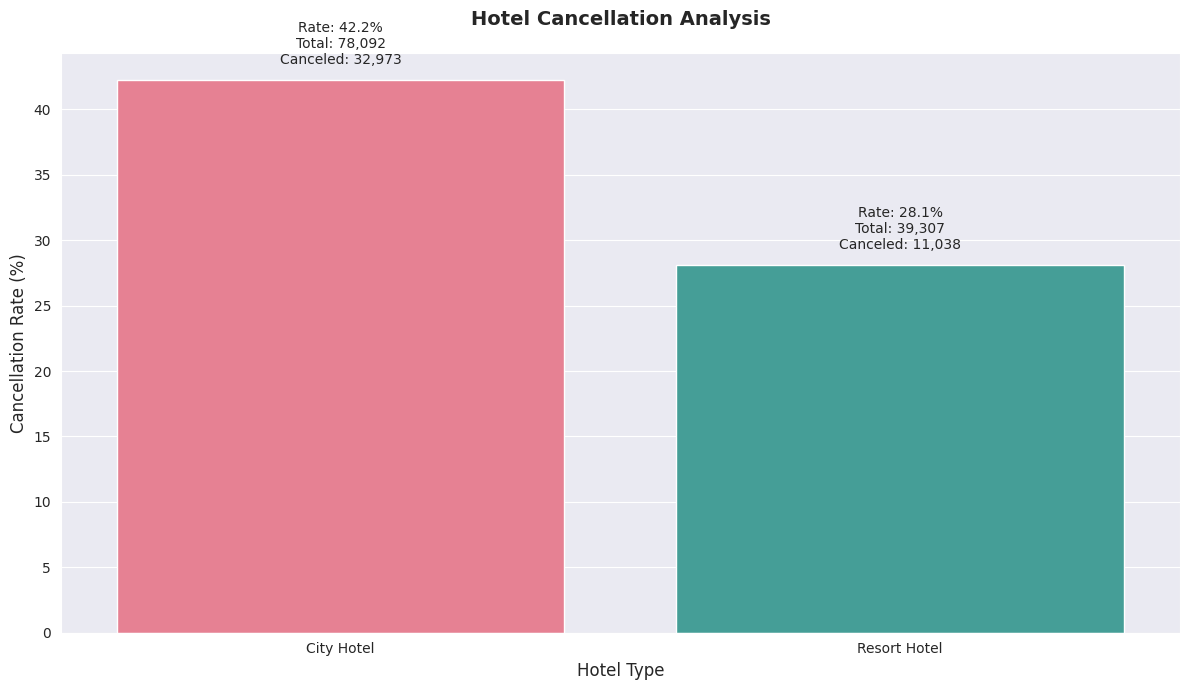

,total_bookings,cancellation_rate,total_cancellations,cancellation_percentage
hotel,,,,
City Hotel,78092,0.4222,32973,42.22
Resort Hotel,39307,0.2808,11038,28.08


In [ ]:
plot_hotel_cancellations(hotel_df)

## 2.2. Identifying the most frequently ordered meal types.

**Why:** This analysis identifies the frequency and percentage distribution of different meal types booked by guests.

**Observation:** Out of a total of 117,399 bookings, the most frequently ordered meal type was “BB” (Bed and Breakfast), accounting for 77.35% of total meal orders. The second most common was “HB” (Half Board) at 12.15%, followed by “SC” (Self-Catering) at 8.87%. Other meal types, including Undefined and FB (Full Board), constituted a small fraction of total meal orders. This indicates a clear preference for the Bed and Breakfast option among guests.

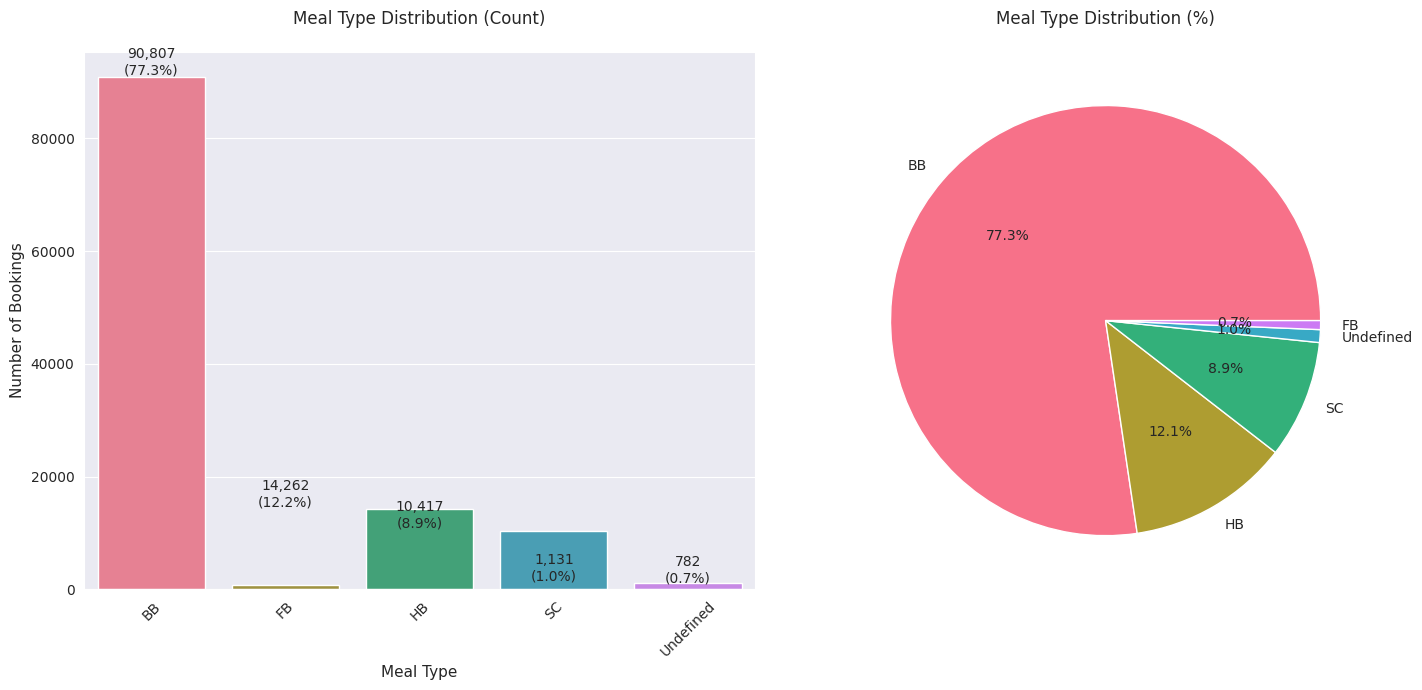

{'total_bookings': 117399,
 'meal_type_counts': meal
 BB           90807
 HB           14262
 SC           10417
 Undefined     1131
 FB             782
 Name: count, dtype: int64,
 'meal_type_percentages': meal
 BB           77.35
 HB           12.15
 SC            8.87
 Undefined     0.96
 FB            0.67
 Name: count, dtype: float64}

In [ ]:
plot_meal_distribution(hotel_df)

## 2.3. Determining the number of returning guests.

**Why:**

This analysis investigates the proportion of returning guests to understand customer loyalty and retention patterns.

**Observation:** Out of 117,399 total bookings, there were 3,271 returning guests, constituting approximately 2.79% of the total. In contrast, first-time guests represented 97.21% of bookings. This significant disparity highlights the challenge hotels face in converting first-time visitors into repeat customers, indicating that marketing strategies might need to focus on enhancing customer loyalty.

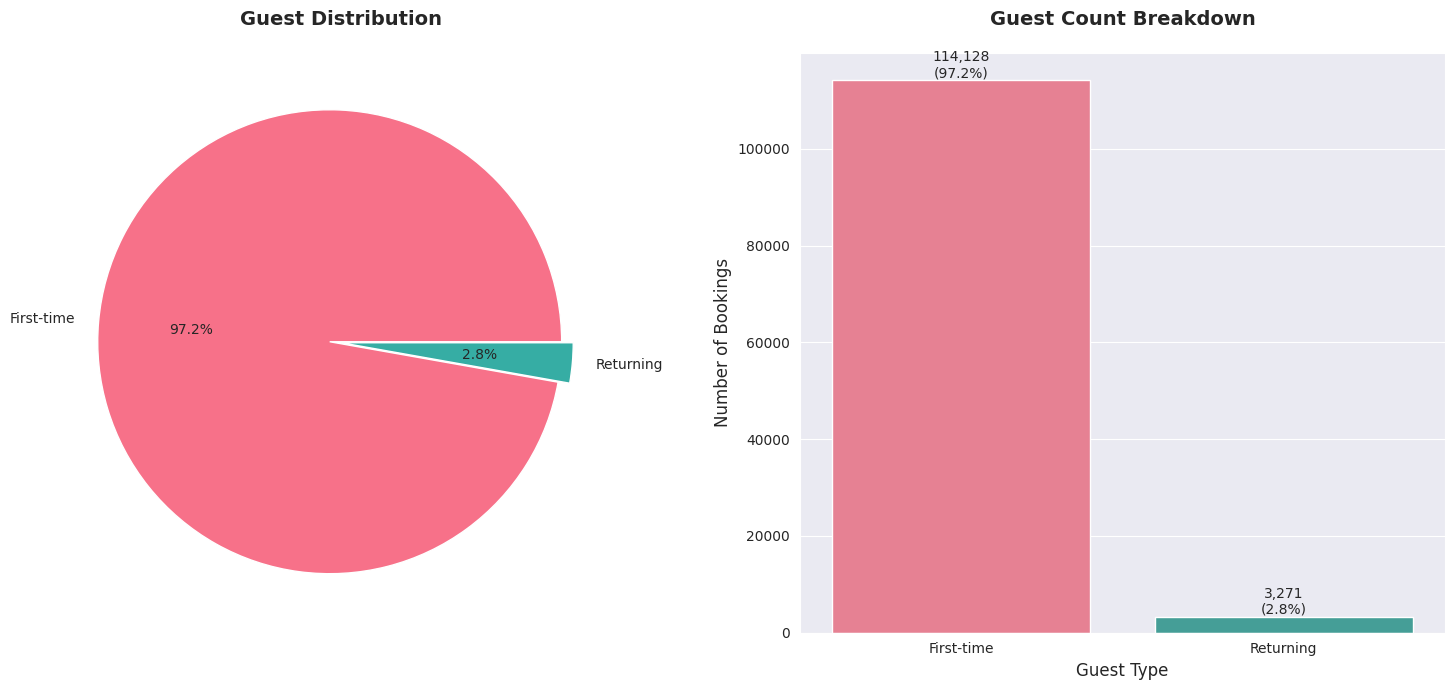

{'total_bookings': 117399,
 'returning_guests': 3271,
 'first_time_guests': 114128,
 'returning_percentage': 2.79,
 'first_time_percentage': 97.21}

In [ ]:
# Analyze returning guest patterns
plot_returning_guests(hotel_df)



## 2.4. Discovering the most booked room types.

**Why:** This analysis identifies the most popular room types booked by guests, providing insights into customer preferences.


**Observation:** The analysis shows that the most booked room type was “A,” with 84,554 bookings (72.02%), while the least booked was “L,” with only 6 bookings (0.01%). Other room types, such as “D” and “E,” had 18,999 and 6,418 bookings, respectively. This data suggests that room type A is the most appealing to guests, possibly due to its features, pricing, or location.

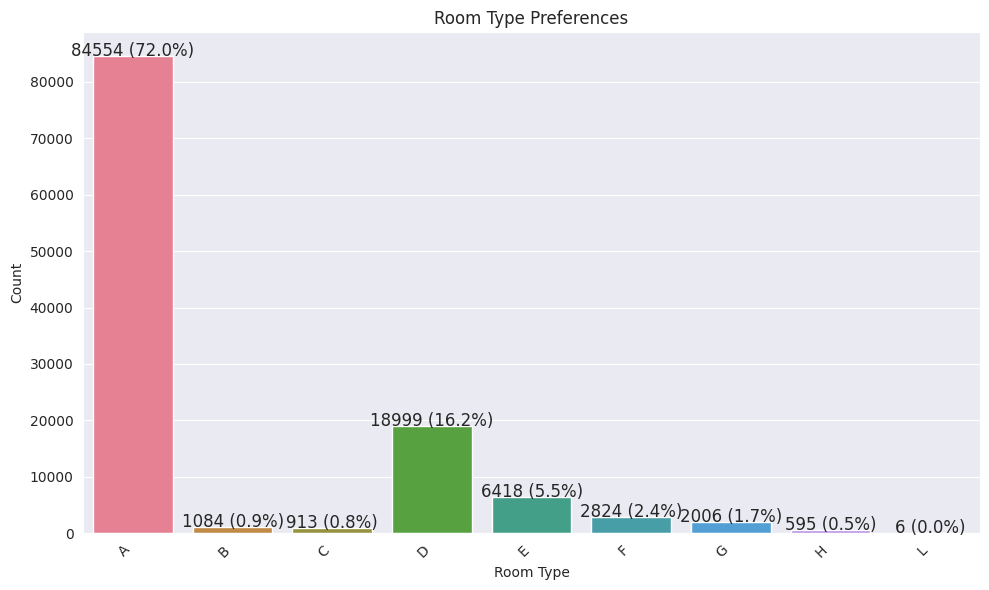

In [ ]:
# Analyze room type preferences
plot_room_types(hotel_df)



## 2.5. Exploring correlations between room types and cancellations.

**Why:** Understanding the cancellation rates for different room types helps identify potential issues and improve customer retention strategies.

**Observation:** The analysis reveals varying cancellation rates across room types. For instance, room type “H” had a cancellation rate of 41.18%, while room type “A” had a lower rate of 39.59%. In contrast, room type “L” exhibited a cancellation rate of 33.33%. This indicates that certain room types, particularly “H,” may be at higher risk for cancellations, suggesting that targeted interventions could be necessary to reduce this rate.

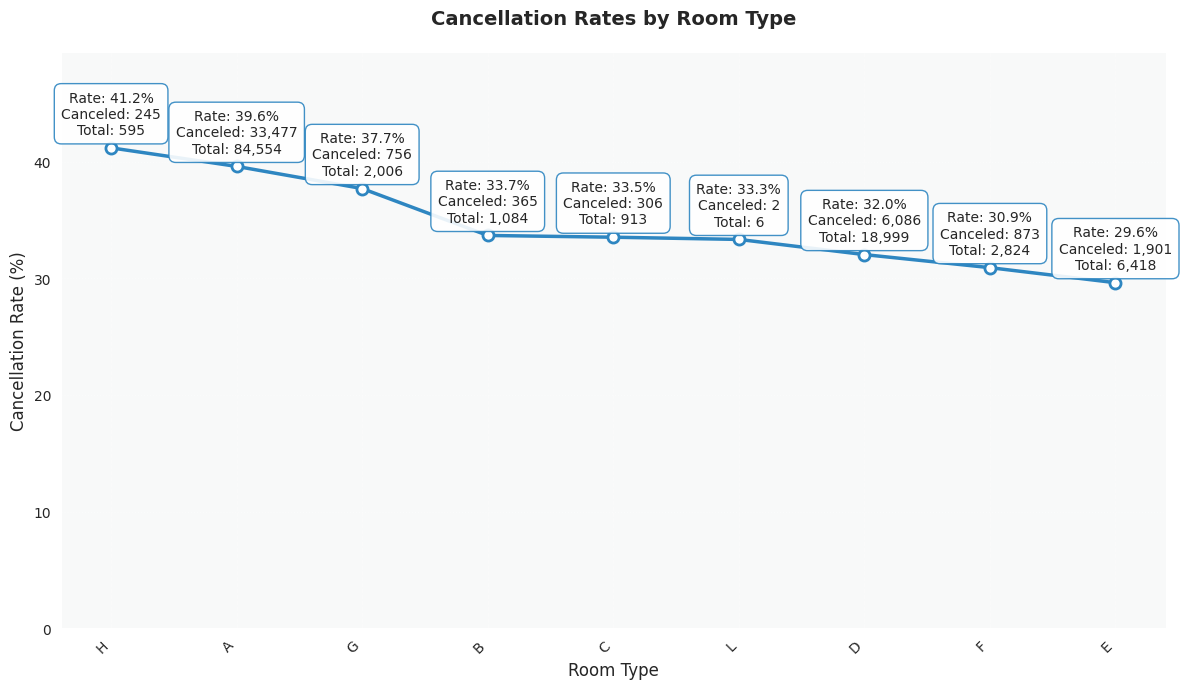

,total_bookings,cancellation_rate,total_cancellations,cancellation_percentage
reserved_room_type,,,,
H,595,0.4118,245,41.18
A,84554,0.3959,33477,39.59
G,2006,0.3769,756,37.69
B,1084,0.3367,365,33.67
C,913,0.3352,306,33.52
L,6,0.3333,2,33.33
D,18999,0.3203,6086,32.03
F,2824,0.3091,873,30.91
E,6418,0.2962,1901,29.62


In [ ]:
# Analyze room-specific cancellation patterns
plot_cancellation_by_room_type(hotel_df)


# 3. Feature Engineering (20%)


---

## 3.1. Binning

Analysing possible columns which we can use for binning

In [ ]:
# Check all columns before binning
columns_to_check = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']
for col in columns_to_check:
    print(f"\n{col} distribution:\n")
    print(hotel_df[col].describe())
    print(hotel_df[col].value_counts().sort_index())


lead_time distribution:

count    117399.000000
mean        103.373385
std         101.388704
min           0.000000
25%          19.000000
50%          71.000000
75%         162.000000
max         376.000000
Name: lead_time, dtype: float64
lead_time
0      5767
1      3282
2      1990
3      1741
4      1645
       ... 
372      44
373      29
374      21
375       2
376    2963
Name: count, Length: 376, dtype: int64

adr distribution:

count    117399.000000
mean        102.287993
std          42.945654
min           0.260000
25%          70.530000
50%          95.000000
75%         126.000000
max         209.205000
Name: adr, dtype: float64
adr
0.260         1
0.500         1
1.000        14
1.480         1
1.560         2
           ... 
209.070       1
209.100       7
209.170       2
209.200       2
209.205    4050
Name: count, Length: 7810, dtype: int64

stays_in_weekend_nights distribution:

count    117399.000000
mean          0.931601
std           0.967498
min           0.00

### Why:

Binning was performed on the lead_time, adr, stays_in_weekend_nights, and stays_in_week_nights columns to transform continuous numerical data into categorical representations. This was done to:

**Enhance Interpretability:** By grouping values into meaningful categories, we can gain a better understanding of booking patterns and customer behavior. For example, instead of looking at individual lead times, we can analyze trends based on categories like "short lead time" and "long lead time."

**Improve Model Performance:** Some machine learning models may perform better with categorical features. Binning can help capture non-linear relationships between the numerical features and the target variable.
Reduce Overfitting: By grouping similar values together, binning can reduce the noise and complexity of the data, potentially preventing overfitting in models.

**Facilitate Analysis:** Categorical data is often easier to analyze and visualize using techniques like bar charts, pie charts, and frequency tables.
Observation:

### Observations:

**Lead Time:** Booking patterns could be analyzed based on lead time categories, providing insights into how far in advance guests typically book their stays. This could reveal trends related to booking behavior and seasonality.

**ADR:** Categorizing ADR into price ranges helped identify different customer segments and allowed for an analysis of pricing strategies and revenue management. This provided a clearer view of the distribution of bookings across different price points.

**Stay Duration:** By creating categories for total stay duration (combining weekend and week nights), we were able to gain a better understanding of guest preferences regarding the length of their stays. This could help with capacity planning and resource allocation.

### lead_time:

In [ ]:
bins = [0, 7, 30, 90, 180, float('inf')]  # Defining bin edges
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']  # Defining bin labels
hotel_df['lead_time_bin'] = pd.cut(hotel_df['lead_time'], bins=bins, labels=labels)

### adr:

In [ ]:
   bins = [0, 70, 100, 150, 200, float('inf')]
   labels = ['Budget', 'Mid-Range', 'Upper Mid-Range', 'Luxury', 'Ultra Luxury']
   hotel_df['adr_bin'] = pd.cut(hotel_df['adr'], bins=bins, labels=labels)

### stays_in_weekend_nights and stays_in_week_nights:

In [ ]:
# Combining weekend and week nights for total stay duration
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
bins = [0, 2, 5, 10, float('inf')]
labels = ['Short Stay', 'Medium Stay', 'Long Stay', 'Extended Stay']
hotel_df['stay_duration_bin'] = pd.cut(hotel_df['total_stay'], bins=bins, labels=labels)

### Result:

In [ ]:
print(hotel_df['lead_time_bin'].value_counts())
print(hotel_df['adr_bin'].value_counts())
print(hotel_df['stay_duration_bin'].value_counts())

lead_time_bin
Medium        29295
Long          26304
Very Long     24551
Short         18648
Very Short    12834
Name: count, dtype: int64
adr_bin
Mid-Range          36503
Upper Mid-Range    35242
Budget             29149
Luxury             11576
Ultra Luxury        4929
Name: count, dtype: int64
stay_duration_bin
Medium Stay      51997
Short Stay       47752
Long Stay        17320
Extended Stay      330
Name: count, dtype: int64


## 3.2. Encoding

**Why:**

One-hot encoding was applied to nominal categorical features (e.g., meal, customer\_type, hotel, country) to convert them into a numerical format compatible with machine learning algorithms. The reasons include:

*   **Machine Learning Compatibility:** Algorithms require numerical input, and one-hot encoding makes categorical data usable.
    
*   **Avoiding Ordinal Misinterpretation:** It prevents assigning artificial order to unordered categories (e.g., 'meal' types).
    
*   **Improved Model Performance:** It helps models learn category-target relationships more effectively.
    

**Observations:**

Key outcomes after one-hot encoding:

*   **Increased Dimensionality:** The dataset grew due to additional binary columns for each category.
    
*   **Sparse Data:** Most dummy variables are 0s, as each observation fits only one category per feature.
    
*   **Multicollinearity Avoidance:** Using drop\_first=True prevented perfect multicollinearity, improving model stability.
    
*   **Model-Ready Data:** The dataset is now in numerical form, ready for machine learning models.

In [ ]:
original_columns = list(hotel_df.columns)
# One-Hot Encoding for Nominal Categorical Features
nominal_features = ['meal', 'customer_type', 'hotel', 'country',
                    'market_segment', 'distribution_channel',
                    'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'lead_time_bin', 'adr_bin', 'stay_duration_bin']

hotel_df = pd.get_dummies(hotel_df, columns=nominal_features, drop_first=True)
# Label Encoding for Ordinal Categorical Feature (arrival_date_month)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].map(month_mapping)

In [ ]:
# Checking encoded features
print(hotel_df.head())

   is_canceled  lead_time arrival_date_month  arrival_date_day_of_month  \
2        False          7                  7                          1   
3        False         13                  7                          1   
4        False         14                  7                          1   
5        False         14                  7                          1   
6        False          0                  7                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       2         0       0   
3                        0                     1       2         0       0   
4                        0                     2       2         0       0   
5                        0                     2       2         0       0   
6                        0                     2       2         0       0   

   is_repeated_guest  ...  lead_time_bin_Medium  lead_time_bin_Long  \
2        

## 3.3. Scaling

### Why:

Feature scaling using StandardScaler was applied to the selected numerical features (numeric\_columns) in the hotel\_df DataFrame to:

*   **Enhance Algorithm Performance:** Ensure features with varying scales do not disproportionately influence model learning.
    
*   **Prevent Bias:** Give all features equal importance, reducing potential bias.
    
*   **Speed up Training:** Help algorithms converge faster during model training.
    

### Observation:

After applying StandardScaler:

*   **Standardized Values:** The values in numeric\_columns were transformed into standardized values, typically within the range of -3 to +3.
    
*   **Centered and Scaled Data:** Data in each scaled column is now centered around zero with a standard deviation of 1, ensuring similar ranges for all features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns that need scaling
numeric_columns = ['arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                   'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests',
                   'total_stay']

# Initialise the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected numeric columns
hotel_df[numeric_columns] = scaler.fit_transform(hotel_df[numeric_columns])


# Check scaled values
print(hotel_df[numeric_columns].head())

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
2                  -1.685316                -0.962901             -0.937619   
3                  -1.685316                -0.962901             -0.937619   
4                  -1.685316                -0.962901             -0.280432   
5                  -1.685316                -0.962901             -0.280432   
6                  -1.685316                -0.962901             -0.280432   

   previous_cancellations  previous_bookings_not_canceled  booking_changes  \
2               -0.102461                       -0.086626              0.0   
3               -0.102461                       -0.086626              0.0   
4               -0.102461                       -0.086626              0.0   
5               -0.102461                       -0.086626              0.0   
6               -0.102461                       -0.086626              0.0   

   days_in_waiting_list  required_car_parking_spaces  \


## 3.4. Feature selection

### Why We Used This:

1.  **Feature Selection**: We performed feature selection to identify the most relevant features that contribute to predicting the target variable (is\_canceled). This helps in improving model performance by focusing on the features that have the most significant impact on cancellations.
    
2.  **Variance Filtering**: By removing constant features (those with zero variance), we ensured that only informative features were retained for further analysis. This step helps eliminate noise and reduces the dimensionality of the dataset.
    
3.  **Sequential Feature Selection**: We utilized a wrapper method (Sequential Feature Selector) to evaluate the contribution of each feature iteratively. This method considers the interactions between features and selects the best subset based on model performance, leading to a more effective feature set.
    
4.  **Correlation Analysis**: After selecting the features, we calculated the correlations with the target variable to understand the relationships between the selected features and cancellations. This analysis provides insights into which features are most predictive of the target.
    

### Observations:

1.  **Data Statistics**: The summary statistics for the selected features indicate that:
    
    *   The features have been standardized (mean close to 0 and standard deviation close to 1), which is typical for features that have undergone transformations like one-hot encoding or scaling.
        
    *   The previous\_cancellations feature has a mean close to zero, suggesting a balanced distribution of cancellations in the dataset.
        
    *   The deposit\_type\_Non Refund feature has a mean of approximately 0.124, indicating that about 12.4% of the bookings are non-refundable, which may significantly influence cancellation behavior.
        
2.  **Correlations with Target Variable (is\_canceled)**:
    
    *   **deposit\_type\_Non Refund**: This feature has the highest positive correlation (0.48) with cancellations, indicating that non-refundable bookings are strongly associated with higher cancellation rates.
        
    *   **previous\_cancellations**: This feature shows a positive correlation (0.11), suggesting that guests with a history of cancellations are slightly more likely to cancel again.
        
    *   **distribution\_channel\_Direct**: This feature has a negative correlation (-0.15), indicating that bookings made directly through the hotel channel are less likely to be canceled compared to other channels.
        
    *   Other features, such as various country indicators, show low correlations with the target variable, suggesting they may have a minimal impact on cancellation rates.

Data Statistics After Feature Selection:
       previous_cancellations  previous_bookings_not_canceled    country_AGO  \
count            1.173990e+05                    1.173990e+05  117399.000000   
mean            -1.452570e-18                   -9.683799e-19       0.003024   
std              1.000004e+00                    1.000004e+00       0.054907   
min             -1.024612e-01                   -8.662558e-02       0.000000   
25%             -1.024612e-01                   -8.662558e-02       0.000000   
50%             -1.024612e-01                   -8.662558e-02       0.000000   
75%             -1.024612e-01                   -8.662558e-02       0.000000   
max              3.052927e+01                    4.970072e+01       1.000000   

         country_ARE    country_DEU    country_HKG    country_SAU  \
count  117399.000000  117399.000000  117399.000000  117399.000000   
mean        0.000426       0.061721       0.000247       0.000409   
std         0.020633       0.24

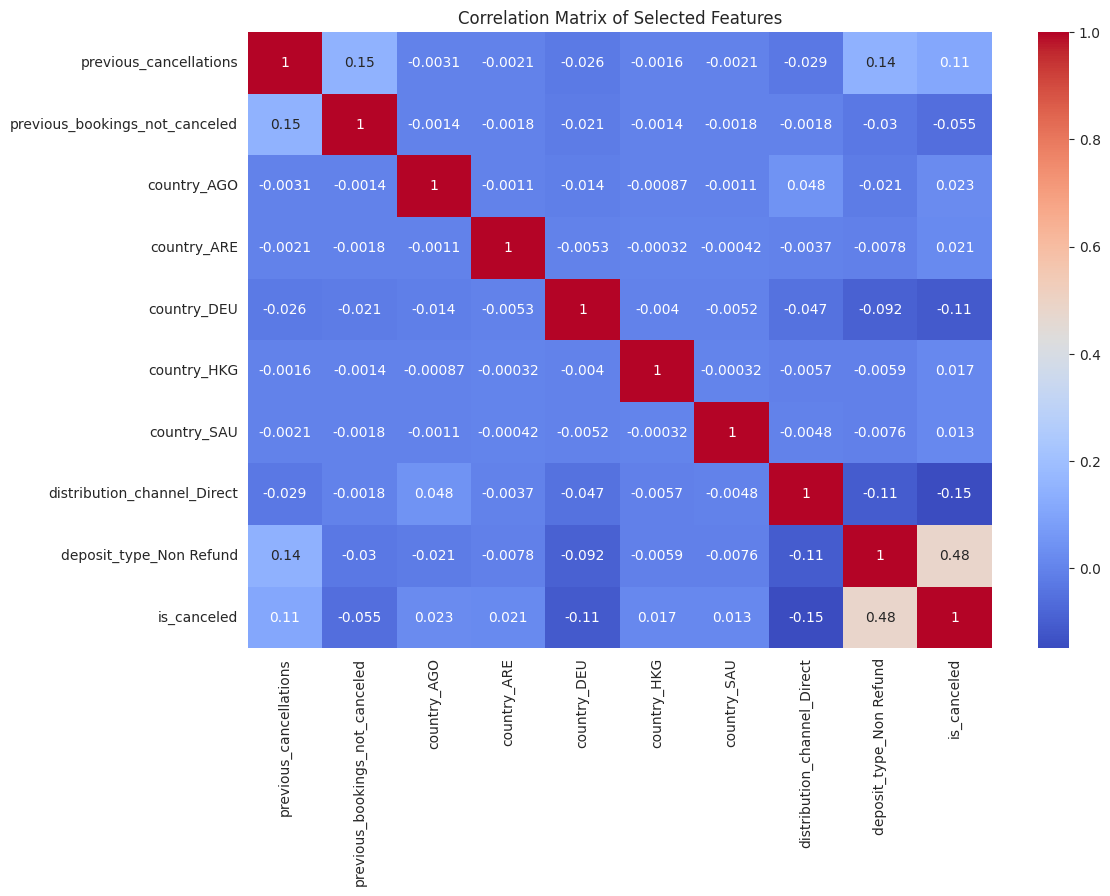

In [ ]:
   # Preparing the data
   X = hotel_df.drop(columns="is_canceled")  # Use the transformed DataFrame
   y = hotel_df["is_canceled"]

   # Removing constant features (those with zero variance)
   constant_filter = VarianceThreshold(threshold=0)
   X_filtered = constant_filter.fit_transform(X)

   # Getting the columns that were retained after variance filtering
   filtered_columns = X.columns[constant_filter.get_support()]

   # Initialise the Decision Tree Classifier for feature selection
   model = DecisionTreeClassifier(random_state=1)

   # Perform forward feature selection
   forward_selector = SequentialFeatureSelector(model, n_features_to_select=9, direction='forward')
   forward_selector.fit(X_filtered, y)

   # Get the selected features
   selected_features_forward = forward_selector.get_support(indices=True)

   # Stores the selected features back into the original DataFrame
   hotel_df_selected = pd.DataFrame(X_filtered[:, selected_features_forward], columns=filtered_columns[selected_features_forward])
   hotel_df_selected['is_canceled'] = y.values  # Add the target variable back to the DataFrame

   # Calculates correlations with the target variable for the selected features
   correlations = hotel_df_selected.corr()['is_canceled'].drop('is_canceled')

   # --- Prints data statistics and correlation information ---
   print("Data Statistics After Feature Selection:")
   print(hotel_df_selected.describe())
   print("\n")

   print("Correlations with Target Variable (is_canceled):")
   for feature, correlation in correlations.items():
       print(f"{feature}: {correlation:.2f}")

   # --- Create and display the heatmap (optional) ---
   plt.figure(figsize=(12, 8))
   sns.heatmap(hotel_df_selected.corr(), annot=True, cmap="coolwarm")
   plt.title("Correlation Matrix of Selected Features")
   plt.show()

In [ ]:
   print(hotel_df.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'lead_time_bin_Medium', 'lead_time_bin_Long', 'lead_time_bin_Very Long',
       'adr_bin_Mid-Range', 'adr_bin_Upper Mid-Range', 'adr_bin_Luxury',
       'adr_bin_Ultra Luxury', 'stay_duration_bin_Medium Stay',
       'stay_duration_bin_Long Stay', 'stay_duration_bin_Extended Stay'],
      dtype='object', length=246)


# 4. Classifier Training (20%)


---

## 4.1. Data Splitting (5%)
---
**Why:**
We split the dataset into training and testing sets to:
Train the Model: The training set (70% of the data) is used to teach the model the relationships between the features and the target variable (is_canceled).
Evaluate Performance: The testing set (30% of the data) is reserved for assessing how well the model generalizes to unseen data, helping to prevent overfitting.
**Observation:**
Training Set Shape: (82179, 9) indicates that 82,179 samples were used for training, providing a robust dataset for the model to learn from.
Testing Set Shape: (35220, 9) shows that 35,220 samples were used for testing, ensuring a reliable evaluation of the model's performance on new data.
This balanced split allows for effective model training and accurate performance assessment.

In [ ]:
# Get the selected feature names
selected_feature_names = hotel_df_selected.columns[:-1].tolist()  # Exclude the target variable
print(selected_feature_names)

# Selecting the features (X) and target variable (y)
X = hotel_df_selected[selected_feature_names]  # Use the selected features
y = hotel_df_selected['is_canceled']  # Target variable

# Splitting the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

['previous_cancellations', 'previous_bookings_not_canceled', 'country_AGO', 'country_ARE', 'country_DEU', 'country_HKG', 'country_SAU', 'distribution_channel_Direct', 'deposit_type_Non Refund']
Training set shape: (82179, 9)
Testing set shape: (35220, 9)


## 4.2. Model Training (10%)
---
#### Why:

*   **Model Selection**: We chose the Decision Tree Classifier for its simplicity and interpretability. Decision trees are effective for classification tasks and can handle both numerical and categorical data.
    
*   **Training the Model**: The model is trained using the training set (X\_train and y\_train). This process involves the algorithm learning patterns and relationships in the data to make predictions about the target variable (is\_canceled).
    

#### Observation:

*   **Model Initialization**: The Decision Tree Classifier was initialized with a random\_state of 42 to ensure reproducibility of results. This means that every time the model is trained, it will produce the same results given the same data.
    
*   **Training Confirmation**: The message "Model training completed." indicates that the training process has finished successfully. The model is now ready to make predictions on new data.

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Save the trained model
joblib.dump(dt_classifier, "hotel_booking_model.pkl")

# Save the feature names (the ones you have selected already)
joblib.dump(selected_feature_names, 'feature_names.pkl')

# Print confirmation
print("Model training completed and saved.")

Model training completed and saved.


## 4.3. Model Evaluation (5%)
---
Why: Evaluating the model’s performance is crucial to understanding how well it predicts hotel cancellations. Metrics like accuracy, precision, recall, and F1-score give insights into the model’s effectiveness and help identify areas for improvement.

Observation: The model achieved an accuracy of 76.34%, meaning it correctly predicted outcomes for about three-quarters of the test instances. This is above the 70% threshold, showing that the model is reasonably reliable.

Classification Report Overview:

	•	Precision: The model has a precision of 0.73 for False (no cancellation) and 0.99 for True (cancellation). This high precision for True indicates that when the model predicts a cancellation, it’s usually correct.
	•	Recall: The recall is 1.00 for False and 0.38 for True. While it accurately identifies all non-cancellations, it struggles with actual cancellations, suggesting an area for improvement.
	•	F1-Score: The F1-score is 0.84 for False and 0.55 for True, reflecting a balance between precision and recall. The lower F1-score for True indicates that the model needs to improve in recognising cancellations.
	•	Support: The count of true instances is 21,894 for False and 13,326 for True, showing there are significantly more non-cancellations in the dataset.

Confusion Matrix Insight:

The confusion matrix shows:

	•	True Negatives (TN): 21,894
	•	False Positives (FP): 0
	•	False Negatives (FN): 8,254
	•	True Positives (TP): 5,097

Prediction Value Percentages:

	•	Prediction False: 85.53%
	•	Prediction True: 14.47%

This imbalance in predictions suggests the model tends to favour non-cancellations, potentially leading to missed cancellations.

Accuracy: 76.34%
The model achieved over 70% accuracy!

Classification Report:
              precision    recall  f1-score   support

       False       0.73      1.00      0.84     21894
        True       0.99      0.38      0.55     13326

    accuracy                           0.76     35220
   macro avg       0.86      0.69      0.69     35220
weighted avg       0.83      0.76      0.73     35220


Confusion Matrix:


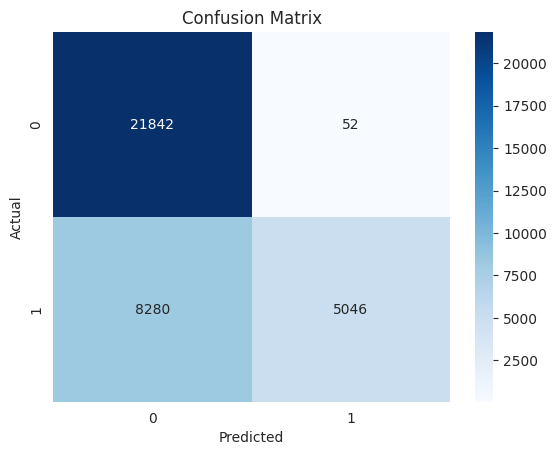


Prediction Value Percentages:
Prediction False: 85.53%
Prediction True: 14.47%


In [ ]:

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

#  Calculates accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Checks if accuracy meets the 70% threshold
if accuracy > 0.7:
    print("The model achieved over 70% accuracy!")
else:
    print("The model's accuracy is below 70%. Consider further optimization.")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculating and display prediction percentages
unique_predictions, prediction_counts = np.unique(y_pred, return_counts=True)
prediction_percentages = (prediction_counts / len(y_pred)) * 100

print("\nPrediction Value Percentages:")
for prediction, percentage in zip(unique_predictions, prediction_percentages):
    print(f"Prediction {prediction}: {percentage:.2f}%")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

def train_improved_model(X_train, X_test, y_train, y_test):
    """
    Train multiple models with various improvements to achieve higher accuracy.
    """
    results = {}

    # 1. Improved Decision Tree with Hyperparameter Tuning
    dt_params = {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    dt_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ])

    dt_grid = GridSearchCV(dt_pipeline, {'dt__' + key: value for key, value in dt_params.items()},
                          cv=5, scoring='accuracy', n_jobs=-1)
    dt_grid.fit(X_train, y_train)
    dt_pred = dt_grid.predict(X_test)
    results['Tuned Decision Tree'] = {
        'accuracy': accuracy_score(y_test, dt_pred),
        'model': dt_grid.best_estimator_,
        'best_params': dt_grid.best_params_
    }

    # 2. Random Forest Classifier
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    rf_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    rf_grid = GridSearchCV(rf_pipeline, {'rf__' + key: value for key, value in rf_params.items()},
                          cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    rf_pred = rf_grid.predict(X_test)
    results['Random Forest'] = {
        'accuracy': accuracy_score(y_test, rf_pred),
        'model': rf_grid.best_estimator_,
        'best_params': rf_grid.best_params_
    }

    # 3. Gradient Boosting with SMOTE for handling imbalanced data
    smote_gb_pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ])

    gb_params = {
        'gb__n_estimators': [100, 200],
        'gb__learning_rate': [0.01, 0.1],
        'gb__max_depth': [3, 5]
    }

    gb_grid = GridSearchCV(smote_gb_pipeline, gb_params, cv=5, scoring='accuracy', n_jobs=-1)
    gb_grid.fit(X_train, y_train)
    gb_pred = gb_grid.predict(X_test)
    results['Gradient Boosting with SMOTE'] = {
        'accuracy': accuracy_score(y_test, gb_pred),
        'model': gb_grid.best_estimator_,
        'best_params': gb_grid.best_params_
    }

    return results

def print_results(results):
    """
    Print the results of all models with their accuracies and best parameters.
    """
    print("\nModel Performance Comparison:")
    print("-" * 50)
    for model_name, result in results.items():
        print(f"\n{model_name}:")
        print(f"Accuracy: {result['accuracy']*100:.2f}%")
        print("Best Parameters:")
        for param, value in result['best_params'].items():
            print(f"- {param}: {value}")

# Example usage
"""
# Assuming X_train, X_test, y_train, y_test are your existing train-test split data
results = train_improved_model(X_train, X_test, y_train, y_test)
print_results(results)
"""

'\n# Assuming X_train, X_test, y_train, y_test are your existing train-test split data\nresults = train_improved_model(X_train, X_test, y_train, y_test)\nprint_results(results)\n'

In [ ]:
results = train_improved_model(X_train, X_test, y_train, y_test)
print_results(results)


Model Performance Comparison:
--------------------------------------------------

Tuned Decision Tree:
Accuracy: 76.35%
Best Parameters:
- dt__criterion: gini
- dt__max_depth: 10
- dt__min_samples_leaf: 1
- dt__min_samples_split: 5

Random Forest:
Accuracy: 76.36%
Best Parameters:
- rf__max_depth: 20
- rf__min_samples_leaf: 2
- rf__min_samples_split: 2
- rf__n_estimators: 100

Gradient Boosting with SMOTE:
Accuracy: 76.33%
Best Parameters:
- gb__learning_rate: 0.1
- gb__max_depth: 5
- gb__n_estimators: 100


# 5. Feature Importance (10%)


---
**Why:** Understanding feature importance is crucial in predictive modelling, as it helps identify which factors significantly influence the target variable—in this case, hotel cancellations. This analysis aids in refining models, improving predictions, and guiding strategic decisions in hotel management.

**Observation:** The analysis of the top ten most important features reveals significant insights into the factors influencing cancellations. The feature deposit_type_Non Refund stands out as the most influential variable, accounting for 78.15% of the importance score. This indicates that guests who do not opt for a refundable deposit are significantly less likely to cancel their bookings.

Key Findings:

	1.	Previous Cancellations: The feature previous_cancellations holds a substantial importance score of 9.93%, suggesting that guests with prior cancellations are more likely to cancel again. This highlights a potential area for targeted marketing strategies to retain these guests.
	2.	Previous Bookings Not Canceled: With an importance score of 5.86%, previous_bookings_not_canceled indicates that guests with a history of successfully completed bookings are less likely to cancel. This can inform customer loyalty programs, rewarding consistent behaviour.
	3.	Distribution Channel: The distribution_channel_Direct feature contributes 3.08% to the importance score, suggesting that guests who book directly through the hotel’s website are less likely to cancel than those using third-party platforms. Enhancing direct booking incentives could help reduce cancellations.
	4.	Country Features: The country-specific features (country_DEU, country_AGO, country_ARE, country_SAU, country_HKG) vary significantly in their importance, with country_DEU at 1.98% and the remaining countries contributing less than 1% each. This indicates that geographical factors play a role in cancellation rates, and tailored marketing strategies could be developed for specific markets.


Top 10 Most Important Features:
                          feature percentage
8         deposit_type_Non Refund     78.15%
0          previous_cancellations      9.93%
1  previous_bookings_not_canceled      5.86%
7     distribution_channel_Direct      3.08%
4                     country_DEU      1.98%
2                     country_AGO      0.60%
3                     country_ARE      0.17%
6                     country_SAU      0.12%
5                     country_HKG      0.11%


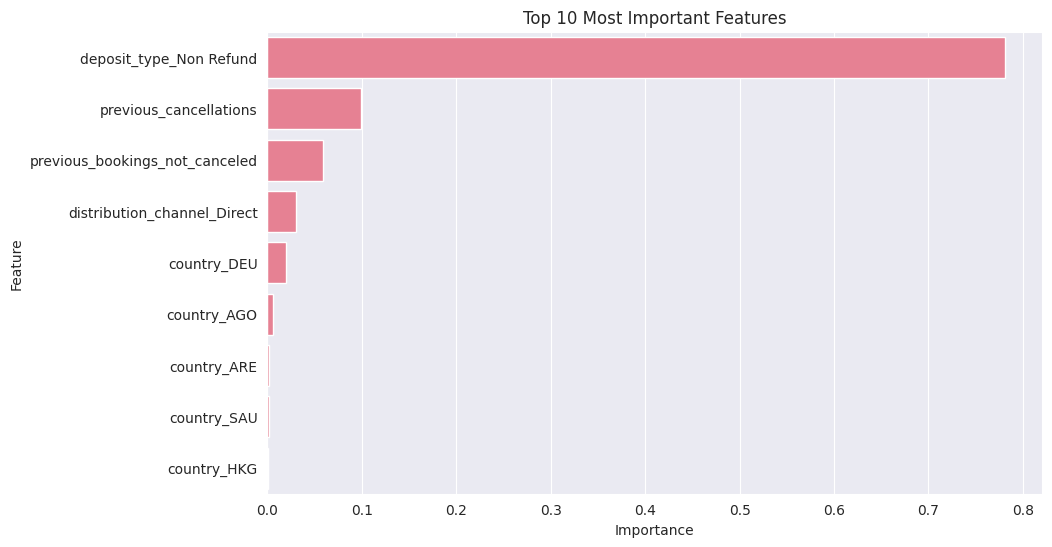

In [ ]:
# Get feature importances from the trained decision tree model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})

# Sorting feature importances in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Calculate percentage importance
feature_importance['percentage'] = (feature_importance['importance'] / feature_importance['importance'].sum()) * 100

# Displaying the top 10 most important features with percentages and % symbol
print("\nTop 10 Most Important Features:")
# Format percentage column to include % symbol
feature_importance['percentage'] = feature_importance['percentage'].apply(lambda x: f'{x:.2f}%')
print(feature_importance[['feature', 'percentage']].head(10).to_string())

# Visualizing the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Why:**

**Understanding Feature Impact:** We calculated feature importances from the trained Decision Tree model to identify which features have the most significant influence on the model's predictions. This helps in understanding the underlying factors that contribute to the likelihood of cancellations.

**Model Interpretability:** By examining feature importances, we can gain insights into the decision-making process of the model, which is particularly valuable for stakeholders who need to understand the model's behavior and rationale.

**Feature Selection:** Identifying the most important features can guide future feature engineering efforts and help in refining the model by focusing on the most impactful variables.


**Observation:**

Top 10 Most Important Features:

**deposit_type_Non Refund:** Importance of 51.52%, indicating it is the most influential feature in predicting cancellations.

**lead_time:** Importance of 26.84%, showing that how far in advance a booking is made significantly affects cancellation likelihood.

**country_PRT:** Importance of 8.99%, suggesting that the country of origin plays a role in cancellation behavior.
total_of_special_requests: Importance of 4.63%, indicating that the number of special requests made by guests also impacts cancellations.

**market_segment_Groups:** Importance of 4.54%, showing that the type of market segment influences cancellation rates.

**distribution_channel_TA/TO:** Importance of 2.62%, indicating that the channel through which the booking was made affects cancellations.

**market_segment_Direct:** Importance of 0.42%, suggesting a minor influence on cancellation likelihood.

**distribution_channel_Direct:** Importance of 0.32%, indicating a small contribution to the model's predictions.

**lead_time_bin_Very Long:** Importance of 0.13%, showing that this binned feature has a minimal impact on the model.

**Visualisation:** The bar plot visually represents the top 10 features, making it easy to compare their importances. This visualisation aids in quickly identifying which features are most critical for the model's decision-making.

This analysis of feature importance is essential for refining the model, enhancing interpretability, and informing business strategies based on the factors that most influence cancellations.